In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [33]:
df = pd.read_csv('churn_data.csv')
df.head(20)

,uuid,date,event
0,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-02-07,small_purchase
1,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-02-20,small_purchase
2,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-04-12,contact
3,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-04-19,contact
4,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-04-30,contact
5,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-04-30,big_purchase
6,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-05-16,small_purchase
7,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-06-05,contact
8,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-06-14,contact
9,00038504-c286-4c49-a6ed-d7853f65f7d6,2019-07-11,contact


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104103 entries, 0 to 104102
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   uuid    104103 non-null  object
 1   date    104103 non-null  object
 2   event   104103 non-null  object
dtypes: object(3)
memory usage: 2.4+ MB


In [35]:
print("Number of Events: ",df.shape[0])
print("Number of Unique Users: ",df.uuid.nunique())
print("Type of Events: ", df.event.unique()[0:3].tolist())

Number of Events:  104103
Number of Unique Users:  1034
Type of Events:  ['small_purchase', 'contact', 'big_purchase']


In [36]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.day
df['dayW'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.day_name()
df['month'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.month
df['year'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.year
df['monthYear'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.to_period('M')


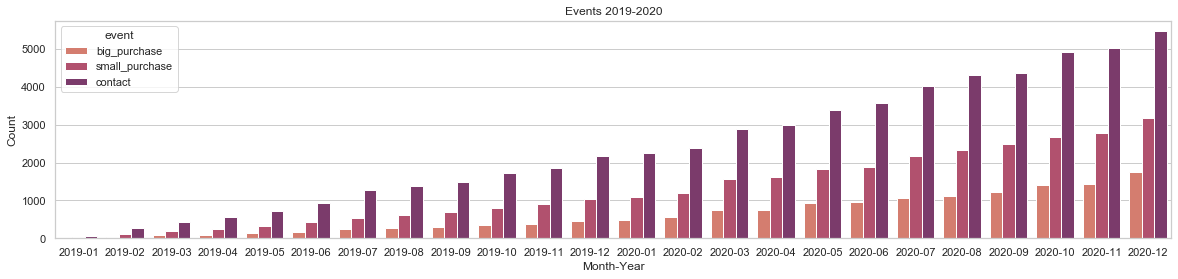

In [37]:
plt.figure(figsize=(20,4))
ax = sns.countplot(data=df.sort_values(by='monthYear',ascending=True),x="monthYear", 
                   hue="event",hue_order=['big_purchase','small_purchase','contact']
                   ,palette="flare")
sns.set(style="whitegrid")
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Events 2019-2020')
plt.show()

In [38]:
intervalBetweenEvents = []
intervalBetweenEvents.append(0)

for row in range(1,len(df)):
    if df.uuid[row] == df.uuid[row-1]:
        diffDates = abs(df.date[row] - df.date[(row-1)]).days
        intervalBetweenEvents.append(diffDates)
    else: intervalBetweenEvents.append(0)

In [39]:
df['interval'] = intervalBetweenEvents

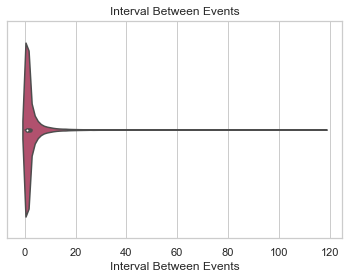

In [40]:
ax = sns.violinplot(data=df, x='interval',palette='flare')
plt.xlabel('Interval Between Events')
plt.title('Interval Between Events')
plt.show()

In [54]:
def calcChurnFP(interval):
    totalEvents = len(df[df.interval > interval])
    truePositive = df[df.interval > interval]['uuid'].nunique()
    falsePositive = totalEvents - truePositive
    
    return print("False Positive:",falsePositive)

In [73]:
for i in range(30,60,5):
    print("Interval:",i," days")
    calcChurnFP(i)
    print("-----------------------")

Interval: 30  days
False Positive: 183
-----------------------
Interval: 35  days
False Positive: 84
-----------------------
Interval: 40  days
False Positive: 38
-----------------------
Interval: 45  days
False Positive: 16
-----------------------
Interval: 50  days
False Positive: 4
-----------------------
Interval: 55  days
False Positive: 0
-----------------------


In [72]:
df.loc[df.interval > 55]

,uuid,date,event,day,dayW,month,year,monthYear,interval
547,0251c7cd-9254-42c4-b1aa-91162a819443,2020-07-02,small_purchase,2,Thursday,7,2020,2020-07,80
1350,03897694-4a38-47c6-820e-118d0c055cf4,2019-12-23,small_purchase,23,Monday,12,2019,2019-12,118
1762,04ab6839-6e71-4175-8a8f-589c91747b1e,2020-07-09,contact,9,Thursday,7,2020,2020-07,74
3307,05f0144d-c5e8-4540-a8c3-1dc09d4d0c49,2019-10-28,small_purchase,28,Monday,10,2019,2019-10,84
10802,1afc3d93-0376-4d24-8bab-7d28d2dd4d56,2020-05-15,big_purchase,15,Friday,5,2020,2020-05,62
11279,1e7f5f3c-305d-44bb-b449-670eefd05d10,2020-08-24,small_purchase,24,Monday,8,2020,2020-08,73
11651,1f94531a-d3c1-4bb6-8e0b-c5f17e32d38c,2019-12-02,contact,2,Monday,12,2019,2019-12,67
12481,228ed3d0-860b-4d58-82eb-bf3b9d12f65c,2020-02-28,contact,28,Friday,2,2020,2020-02,90
12953,25927f4f-d31e-4b5f-87f0-46e41ba4ee56,2020-03-29,big_purchase,29,Sunday,3,2020,2020-03,73
12994,25df2227-4721-4db6-8e47-2eef4c82fe7b,2019-07-22,contact,22,Monday,7,2019,2019-07,65
